In [3]:
# 코랩에서 데이터 로드하기
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

f = open("D:\semi\data\caes.csv", "r", newline='', encoding='utf-8')
reader = csv.reader(f)

cs = list(reader)

# 1. 헤더(컬럼 이름) 분리
header = cs[0]

# 2. 데이터 행 분리 (헤더를 제외한 나머지)
data_rows = cs[1:]

# 3. DataFrame 생성
# data=데이터 행, columns=컬럼 이름 지정
df = pd.DataFrame(data=data_rows, columns=header)

# 결과 확인
df

,Age,Delivery No,Delivery Type,Blood Pressure,Heart Problem,Caesarian,BMI,Smoking Status,Alcohol Use,Family History,Gestational Diabetes,Hospital_Code,Mother's Education Level,Residence,Income Bracket,Folic Acid Supplements,Previous Miscarriage,Iron Level,Blood Group
0,18.0,2,Premature,High,Yes,Yes,18.7,yes,no,no,,,HighSchool,,,,1,6.1,B+
1,20.0,3,Timely,Low,yes,False,20.7,NO,yes,,no,,Graduate,Ubanr,High,yes,no,10.6,O-
2,39.0,0,Premature,Normal,n,1,32.1,N/A,no,Yes,yes,HSP002,HighSchool,Rurl,Medium,,1,12.0,O-
3,31.0,4,Emergency,Normal,yes,Yes,21.4,no,NO,,yes,HSP004,Illiterate,Rurl,Low,,yes,12.4,AB+
4,-1.0,2,Premature,High,y,False,22.4,YES,no,,,HSP001,Graduate,Urban,High,yes,yes,12.8,A-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,43.0,1,Emergency,120/80,no,False,27.9,no,YES,,no,HSP002,College,banU,High,no,,13.4,A-
3999996,26.0,3,Timely,High,n,1,-5.0,no,,Yes,yes,hsp003,Graduate,Rural,Medium,yes,1,14.2,B-
3999997,37.0,1,Dlayede,120/80,no,False,-5.0,NO,NO,,no,HSP004,Graduate,Rural,High,,,8.5,AB+
3999998,30.0,0,Timely,Normal,yes,False,28.2,N/A,no,No,yes,hsp003,Illiterate,Uban,Medium,no,,17.3,B+


In [48]:
# 원본에서 copy하기
cs = df.copy()
cs.head()

,Age,Delivery No,Delivery Type,Blood Pressure,Heart Problem,Caesarian,BMI,Smoking Status,Alcohol Use,Family History,Gestational Diabetes,Hospital_Code,Mother's Education Level,Residence,Income Bracket,Folic Acid Supplements,Previous Miscarriage,Iron Level,Blood Group
0,18.0,2,Premature,High,Yes,Yes,18.7,yes,no,no,NaN,NaN,HighSchool,NaN,NaN,NaN,1,6.1,B+
1,20.0,3,Timely,Low,yes,False,20.7,NO,yes,NaN,no,NaN,Graduate,Ubanr,High,yes,no,10.6,O-
2,39.0,0,Premature,Normal,n,1,32.1,NaN,no,Yes,yes,HSP002,HighSchool,Rurl,Medium,NaN,1,12.0,O-
3,31.0,4,Emergency,Normal,yes,Yes,21.4,no,NO,NaN,yes,HSP004,Illiterate,Rurl,Low,NaN,yes,12.4,AB+
4,-1.0,2,Premature,High,y,False,22.4,YES,no,NaN,NaN,HSP001,Graduate,Urban,High,yes,yes,12.8,A-


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig = cs.hist(bins=15,
                 color='steelblue',
                 #edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 #xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

In [52]:

fig = plt.figure(figsize=(10,8))
title = fig.suptitle("C-section according to age and prior number of deliveries", fontsize=14)
if cs["Delivery No"].dtype == "object":
    cs["Delivery No"] = cs["Delivery No"].map({
        "yes": 1, "Yes": 1, "YES": 1,
        "no": 0, "No": 0, "NO": 0
    }).fillna(cs["Smoking Status"])
sns.set_style('whitegrid')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Age")
ax.set_ylabel(cs["Delivery No"]) 
g = sns.FacetGrid(data=cs, 
                  hue='Caesarian', 
                  palette={1: "orange", 0: "blue"})

g = g.map(sns.distplot,'Age',bins=20,ax=ax)
ax.legend(title='Caesarian')
plt.close(2)

KeyError: 'Yes'

In [5]:
# 흡연
# 흡연 고유값 확인
cs['Smoking Status'].unique()

array(['yes', 'NO', 'N/A', 'no', 'YES'], dtype=object)

In [6]:
#표기 통일
cs['Smoking Status'] = cs['Smoking Status'].replace({
    'YES': 'yes',
    'NO': 'no',
    'None': 'N/A',
    'N/A': 'N/A',    
})
# 결측값 처리
# cs['Smoking Status'] = cs['Smoking Status'].replace('N/A',pd.NA)

In [7]:
cs['Smoking Status'].unique()

array(['yes', 'no', 'N/A'], dtype=object)

In [8]:
cs['Smoking Status'].head(15)

0     yes
1      no
2     N/A
3      no
4     yes
5     yes
6      no
7     yes
8     N/A
9     yes
10    yes
11     no
12     no
13    N/A
14     no
Name: Smoking Status, dtype: object

In [9]:
we = cs['Smoking Status'].value_counts(dropna = False)
we

Smoking Status
yes    1600245
no     1598812
N/A     800943
Name: count, dtype: int64

In [10]:
we.index

Index(['yes', 'no', 'N/A'], dtype='object', name='Smoking Status')

In [11]:
# we=pd.DataFrame(cs['Smoking Status'].value_counts(dropna = False), index=['yes', 'no', 'NA'])
# # we.columns[0] = "smoke"
# we

In [12]:
we.index.values

array(['yes', 'no', 'N/A'], dtype=object)

C:\Users\asia\AppData\Local\Temp\ipykernel_8036\3777570228.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


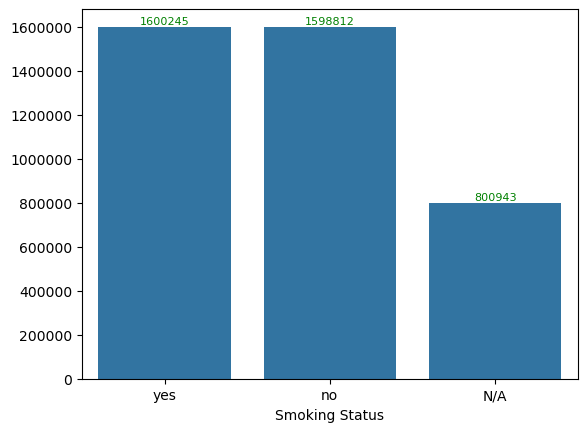

In [13]:
sns.barplot(x = we.index, y = we.values)
# 텍스트 입력 - 막대 위에 값 추가
for i, j in zip(we.index, we.values):
  plt.annotate(j, (i, j), xytext = (0, 2), textcoords = 'offset points', fontsize = 8, ha = 'center', color = 'green')

# y축 눈금 지수표현 없애기 
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

In [14]:
#음주
# 음주 고유값 확인
cs['Alcohol Use'].unique()

array(['no', 'yes', 'NO', '', 'YES'], dtype=object)

In [15]:
cs['Alcohol Use'] = cs['Alcohol Use'].replace({
    'YES': 'yes',
    'NO': 'no',
    '': 'N/A',
  
})
# cs['Alcohol Use']=cs['Alcohol Use'].replace('', pd.NA)

In [16]:
cs['Alcohol Use'].unique()

array(['no', 'yes', 'N/A'], dtype=object)

In [17]:
qw=cs['Alcohol Use'].value_counts(dropna = False)
qw

Alcohol Use
yes    1600111
no     1600068
N/A     799821
Name: count, dtype: int64

In [18]:
qw.index.values

array(['yes', 'no', 'N/A'], dtype=object)

C:\Users\asia\AppData\Local\Temp\ipykernel_8036\2470257092.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


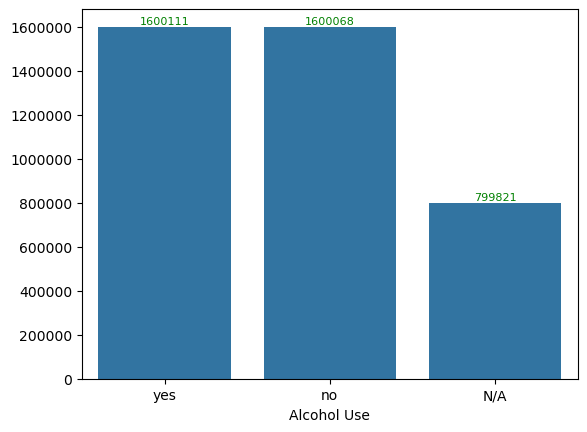

In [19]:
sns.barplot(x = qw.index, y = qw.values)
# 텍스트 입력 - 막대 위에 값 추가
for i, j in zip(we.index, qw.values):
  plt.annotate(j, (i, j), xytext = (0, 2), textcoords = 'offset points', fontsize = 8, ha = 'center', color = 'green')

# y축 눈금 지수표현 없애기 
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = cs.hist(color='steelblue',
                 #edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 #xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 


[Iron Level - Caesarian 상관계수]
                 Iron Level  Smoking Status
Iron Level        1.000000        0.000205
Smoking Status    0.000205        1.000000


C:\Users\asia\AppData\Local\Temp\ipykernel_8036\1743274414.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  }).fillna(cs["Smoking Status"])


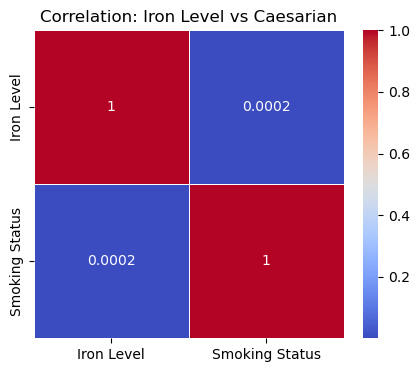

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"D:\semi\data\caes.csv"
df = pd.read_csv(file_path)
cs = df.copy()

# -----------------------------
# 1. Iron Level 전처리 (핵심 부분)
# -----------------------------

cs["Iron Level"] = pd.to_numeric(df["Iron Level"], errors="coerce")

# -----------------------------
# 2. Caesarian 전처리
# -----------------------------

# Caesarian이 True/False일 수도 있어 처리
if cs["Smoking Status"].dtype == "object":
    cs["Smoking Status"] = cs["Smoking Status"].map({
        "yes": 1, "Yes": 1, "YES": 1,
        "no": 0, "No": 0, "NO": 0
    }).fillna(cs["Smoking Status"])

# # Caesarian 값이 여전히 문자열이면 숫자로 강제 변환
# df["Caesarian"] = pd.to_numeric(df["Caesarian"], errors="coerce")

# # -----------------------------
# # 3. Iron Level 또는 Caesarian의 결측치 제거
# # -----------------------------
# df = df.dropna(subset=["Iron Level", "Caesarian"])

# -----------------------------
# 4. 상관계수 + 히트맵
# -----------------------------
corr = cs[["Iron Level", "Smoking Status"]].corr()
print("\n[Iron Level - Caesarian 상관계수]\n", corr)

plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation: Iron Level vs Caesarian")
plt.show()
